In [ ]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
import os
import h5py
import seaborn as sns
from matplotlib.font_manager import FontProperties


font = FontProperties()
font.set_size(7)


hex_colors = ["#000000","#FFFF00","#1CE6FF","#FF34FF","#FF4A46","#008941","#006FA6","#A30059","#FFDBE5","#7A4900","#0000A6","#63FFAC","#B79762","#004D43","#8FB0FF","#997D87","#5A0007","#809693","#FEFFE6","#1B4400","#4FC601","#3B5DFF","#4A3B53","#FF2F80","#61615A","#BA0900","#6B7900","#00C2A0","#FFAA92","#FF90C9","#B903AA","#D16100","#DDEFFF","#000035","#7B4F4B","#A1C299","#300018","#0AA6D8","#013349","#00846F","#372101","#FFB500","#C2FFED","#A079BF","#CC0744","#C0B9B2","#C2FF99","#001E09","#00489C","#6F0062","#0CBD66","#EEC3FF","#456D75","#B77B68","#7A87A1","#788D66","#885578","#FAD09F","#FF8A9A","#D157A0","#BEC459","#456648","#0086ED","#886F4C","#34362D","#B4A8BD","#00A6AA","#452C2C","#636375","#A3C8C9","#FF913F","#938A81","#575329","#00FECF","#B05B6F","#8CD0FF","#3B9700","#04F757","#C8A1A1","#1E6E00","#7900D7","#A77500","#6367A9","#A05837","#6B002C","#772600","#D790FF","#9B9700","#549E79","#FFF69F","#201625","#72418F","#BC23FF","#99ADC0","#3A2465","#922329","#5B4534","#FDE8DC","#404E55","#0089A3","#CB7E98","#A4E804","#324E72","#6A3A4C","#83AB58","#001C1E","#D1F7CE","#004B28","#C8D0F6","#A3A489","#806C66","#222800","#BF5650","#E83000","#66796D","#DA007C","#FF1A59","#8ADBB4","#1E0200","#5B4E51","#C895C5","#320033","#FF6832","#66E1D3","#CFCDAC","#D0AC94","#7ED379","#012C58","#7A7BFF","#D68E01","#353339","#78AFA1","#FEB2C6","#75797C","#837393","#943A4D","#B5F4FF","#D2DCD5","#9556BD","#6A714A","#001325","#02525F","#0AA3F7","#E98176","#DBD5DD","#5EBCD1","#3D4F44","#7E6405","#02684E","#962B75","#8D8546","#9695C5","#E773CE","#D86A78","#3E89BE","#CA834E","#518A87","#5B113C","#55813B","#E704C4","#00005F","#A97399","#4B8160","#59738A","#FF5DA7","#F7C9BF","#643127","#513A01","#6B94AA","#51A058","#A45B02","#1D1702","#E20027","#E7AB63","#4C6001","#9C6966","#64547B","#97979E","#006A66","#391406","#F4D749","#0045D2","#006C31","#DDB6D0","#7C6571","#9FB2A4","#00D891","#15A08A","#BC65E9","#FFFFFE","#C6DC99","#203B3C","#671190","#6B3A64","#F5E1FF","#FFA0F2","#CCAA35","#374527","#8BB400","#797868","#C6005A","#3B000A","#C86240","#29607C","#402334","#7D5A44","#CCB87C","#B88183","#AA5199","#B5D6C3","#A38469","#9F94F0","#A74571","#B894A6","#71BB8C","#00B433","#789EC9","#6D80BA","#953F00","#5EFF03","#E4FFFC","#1BE177","#BCB1E5","#76912F","#003109","#0060CD","#D20096","#895563","#29201D","#5B3213","#A76F42","#89412E","#1A3A2A","#494B5A","#A88C85","#F4ABAA","#A3F3AB","#00C6C8","#EA8B66","#958A9F","#BDC9D2","#9FA064","#BE4700","#658188","#83A485","#453C23","#47675D","#3A3F00","#061203","#DFFB71","#868E7E","#98D058","#6C8F7D","#D7BFC2","#3C3E6E","#D83D66","#2F5D9B","#6C5E46","#D25B88","#5B656C","#00B57F","#545C46","#866097","#365D25","#252F99","#00CCFF","#674E60","#FC009C","#92896B"]
color_palette = sns.color_palette(hex_colors,30)
colors = {
    'mouse': [sns.color_palette("Purples", 3)[1], 
    color_palette[7]] 
}

DATA_DIR = 'S:\ptz_spon_alc\spon\extraction_results'
FILE_BEFORE = os.path.join(DATA_DIR, 'CellTrace_before_calibration.mat')
FILE_AFTER = os.path.join(DATA_DIR, 'CellTrace_after_calibration.mat')

In [13]:
def load_and_process(file_path):
 
    data = sio.loadmat(file_path)
    trace = data['trace']     
    pos = data['pos']         
    nuc_index = data['nucIndex'].flatten()  
    
    
    pos_um = pos.copy().astype(float)
    pos_um[:, 0] = pos_um[:, 0] * 1.0     
    pos_um[:, 1] = pos_um[:, 1] * 0.5*25/16     
    pos_um[:, 2] = pos_um[:, 2] * 0.5*25/16     
    
    return trace, pos_um, nuc_index

trace_be, pos_be, nuc_index_be = load_and_process(FILE_BEFORE)
trace_af, pos_af, nuc_index_af = load_and_process(FILE_AFTER)

print(f"Before Calibration: {trace_be.shape[0]} cells")
print(f"After Calibration: {trace_af.shape[0]} cells")

Before Calibration: 75109 cells
After Calibration: 39477 cells


In [ ]:
def calculate_spatial_correlation_log(trace, pos, min_dist=1, max_dist=500, num_bins=20):

    corr_matrix = np.corrcoef(trace)
    iu = np.triu_indices(corr_matrix.shape[0], k=1)
    correlations = corr_matrix[iu]
    
    distances = pdist(pos)
    
    bins = np.logspace(np.log10(min_dist), np.log10(max_dist), num_bins + 1)
    bin_centers = np.sqrt(bins[:-1] * bins[1:])
    
    mean_corr = []
    sem_corr = []
    
    for i in range(len(bins)-1):
        mask = (distances >= bins[i]) & (distances < bins[i+1])
        if np.any(mask):
            vals = correlations[mask]
            mean_corr.append(np.nanmean(vals))
            sem_corr.append(np.nanstd(vals) / np.sqrt(len(vals)))
        else:
            mean_corr.append(np.nan)
            sem_corr.append(np.nan)
            
    return bin_centers, np.array(mean_corr), np.array(sem_corr)

def add_std_shading(ax, x_data, y_data, sem_data, color, mask=None):

    if mask is not None:
        x_plot = x_data[mask]
        y_plot = y_data[mask]
        sem_plot = sem_data[mask]
    else:
        x_plot = x_data
        y_plot = y_data
        sem_plot = sem_data
    
    y_lower = y_plot - sem_plot
    y_upper = y_plot + sem_plot
    
    ax.fill_between(x_plot, y_lower, y_upper, color=color, alpha=0.3, edgecolor='none')

print("Calculating correlation for 'Before Calibration'...")
bin_centers_be, mean_be, sem_be = calculate_spatial_correlation_log(trace_be, pos_be, min_dist=1, max_dist=600, num_bins=30)

print("Calculating correlation for 'After Calibration'...")
bin_centers_af, mean_af, sem_af = calculate_spatial_correlation_log(trace_af, pos_af, min_dist=1, max_dist=600, num_bins=30)

print("Done.")

Calculating correlation for 'Before Calibration'...
Calculating correlation for 'After Calibration'...
Done.


C:\Users\USER\AppData\Local\Temp\ipykernel_63660\4120574646.py:50: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(bin_centers_be[mask_be], mean_be[mask_be], 'o-',
C:\Users\USER\AppData\Local\Temp\ipykernel_63660\4120574646.py:63: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(bin_centers_af[mask_af], mean_af[mask_af], 'o-',
C:\Users\USER\AppData\Local\Temp\ipykernel_63660\4120574646.py:121: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


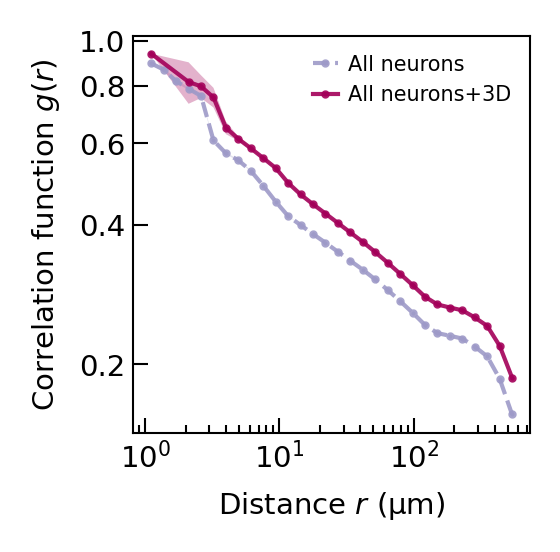

In [ ]:
mm_to_inch = 1/25.4
width = 42 * mm_to_inch
height = 42 * mm_to_inch

fig = plt.figure(figsize=(width, height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

exp = 'mouse'
labels = ['All neurons', 'All neurons+3D']

ylim = None  


mask_be = ~np.isnan(mean_be) & (mean_be > 0) & (bin_centers_be > 0)
add_std_shading(ax, bin_centers_be, mean_be, sem_be, colors[exp][0], mask_be)
ax.plot(bin_centers_be[mask_be], mean_be[mask_be], 'o-',
         markersize=1,
         color=colors[exp][0],
         label=labels[0],
         linewidth=1,
         linestyle='--',
         alpha=0.9)

mask_af = ~np.isnan(mean_af) & (mean_af > 0) & (bin_centers_af > 0)
add_std_shading(ax, bin_centers_af, mean_af, sem_af, colors[exp][1], mask_af)
ax.plot(bin_centers_af[mask_af], mean_af[mask_af], 'o-',
         markersize=1,
         color=colors[exp][1],
         label=labels[1],
         linewidth=1,
         linestyle='-',
         alpha=0.9)

ax.set_xscale('log')
ax.set_yscale('log')


if ylim is not None:
    ax.set_ylim(ylim)

ax.set_xlabel('Distance $\\it{r}$ (μm)', fontproperties=font)
ax.set_ylabel('Correlation function $\\it{g}(r)$', fontproperties=font)

plt.legend(fontsize=5,
           handletextpad=0.5,
           numpoints=1,
           handlelength=1.2, 
           frameon=False)

ax.tick_params(axis='x', which='major', direction='in', labelsize=7, pad=2, width=0.5)
ax.tick_params(axis='x', which='minor', direction='in', labelsize=7, pad=2, width=0.5)
ax.tick_params(axis='y', which='major', direction='in', labelsize=7, pad=2, width=0.5)
ax.tick_params(axis='y', which='minor', direction='in', labelsize=7, pad=2, width=0.5)


ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)
ax.spines['top'].set_linewidth(0.5)


y_min, y_max = ax.get_ylim()

yticks = [0.2, 0.4, 0.6, 0.8, 1.0]
yticks = [y for y in yticks if y_min <= y <= y_max]

ax.set_yticks(yticks)
ax.set_yticklabels([str(y) for y in yticks])

ax.yaxis.set_minor_locator(plt.NullLocator())

plt.tight_layout()
plt.savefig('mouse_spatial_correlation.pdf', dpi=300, 
            bbox_inches='tight',
            transparent=True
            )
plt.show()

**Figure 4 caption:**

Spatiotemporal correlation function g(r) computed from single-cell activity, comparing calibrated and uncalibrated data for all detected neurons, revealing the impact of 3D calibration on spatial correlations.